In [163]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [164]:
results = np.load('results.npy')
sorting = np.load('sorting.npy')

with open('traces.pkl', 'rb') as f:
    traces = pickle.load(f)

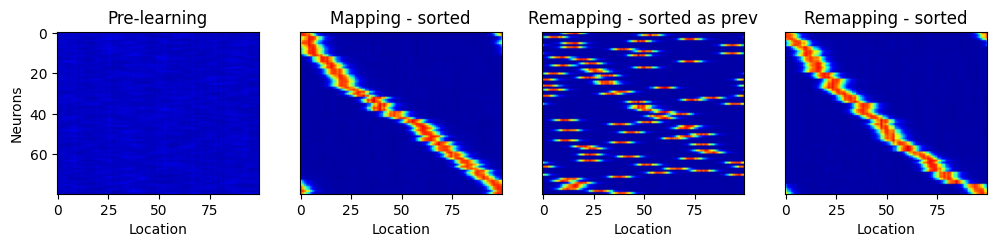

In [165]:
vmax = 50

titles = ['Pre-learning', 'Mapping - sorted','Remapping - sorted as prev', 'Remapping - sorted']
fig, axes = plt.subplots(ncols=4, figsize=(12, 3))

axes[0].imshow(results[0].T, vmin=0, vmax=vmax, cmap='jet')
axes[1].imshow(results[1].T[sorting[1]], vmin=0, vmax=vmax, cmap='jet')
axes[2].imshow(results[2].T[sorting[1]], vmin=0, vmax=vmax, cmap='jet')
axes[3].imshow(results[2].T[sorting[2]], vmin=0, vmax=vmax, cmap='jet')

for i in range(4):
    axes[i].set_xlabel('Location')

axes[0].set_ylabel('Neurons')
for i in range(1,4):
    axes[i].set_yticks([],[])

for i in range(4):
    axes[i].set_title(titles[i])

    

plt.savefig("remapping.png")


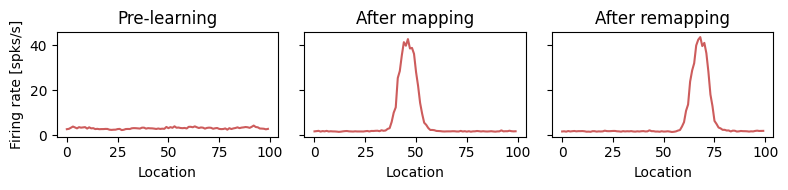

In [250]:
loc_id = 40
color = 'indianred'
fig, ax = plt.subplots(ncols=3, figsize=(8,2), sharey=True)
ax[0].set_ylabel('Firing rate [spks/s]')

for i in range(3):
    ax[i].set_xlabel('Location')

ax[0].plot(results[0].T[sorting[1]][loc_id], c=color)
ax[1].plot(results[1].T[sorting[1]][loc_id], c=color)
ax[2].plot(results[2].T[sorting[1]][loc_id], c=color)

ax[0].set_title('Pre-learning')
ax[1].set_title('After mapping')
ax[2].set_title('After remapping')

plt.tight_layout()
plt.savefig('single_neuron_fr.png')


In [ ]:
w_prox = traces[0]['w_prox']
PSP_prox = traces[0]['PSP_prox']
inps_0 = (w_prox[sorting[1][loc_id]] * PSP_prox.T).T

w_prox = traces[1]['w_prox']
PSP_prox = traces[1]['PSP_prox']
inps_1 = (w_prox[sorting[1][loc_id]] * PSP_prox.T).T

w_prox = traces[2]['w_prox']
PSP_prox = traces[2]['PSP_prox']
inps_2 = (w_prox[sorting[1][loc_id]] * PSP_prox.T).T

In [243]:
baseline_mean = inps_0.mean()
baseline_std = inps_0.std()

start_inp_1 = 7500
stop_inp_1 = 12500

ids_1 = set(np.where(inps_1[:, start_inp_1:stop_inp_1].mean(axis=1) > baseline_mean + 1.5 * baseline_std)[0])

start_inp_2 = 12000
stop_inp_2 = 17000

ids_2 = set(np.where(inps_2[:, start_inp_2:stop_inp_2].mean(axis=1) > baseline_mean + 1.5 * baseline_std)[0])

id_cod_1 = ids_1 - ids_2
id_cod_2 = ids_2 - ids_1


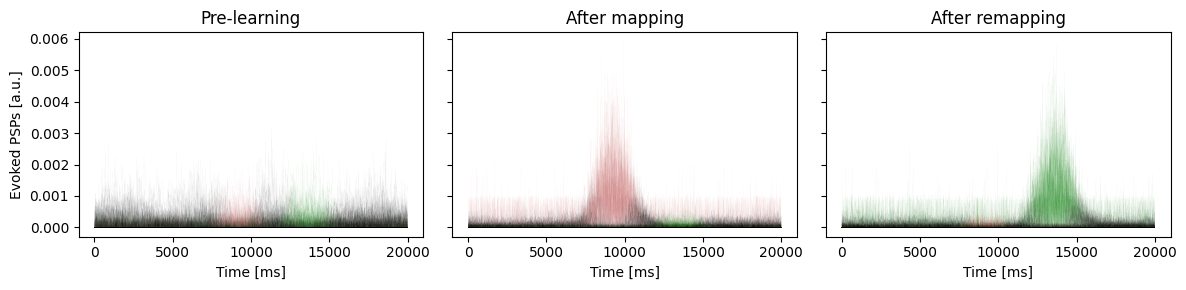

In [248]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3), sharey=True)
ax[0].set_ylabel('Evoked PSPs [a.u.]')

for i in range(3):
    ax[i].set_xlabel('Time [ms]')

c = 'k'



for i, t in enumerate(inps_0):
    if i in id_cod_1:
        c = 'indianred'
    elif i in id_cod_2:
        c = 'green'
    else:
        c = 'k'
    ax[0].plot(t, c=c, alpha=0.2, ls='--', lw=0.05)

for i, t in enumerate(inps_1):
    if i in id_cod_1:
        c = 'indianred'
    elif i in id_cod_2:
        c = 'green'
    else:
        c = 'k'
    ax[1].plot(t, c=c, alpha=0.2, ls='--', lw=0.05)

for i, t in enumerate(inps_2):
    if i in id_cod_1:
        c = 'indianred'
    elif i in id_cod_2:
        c = 'green'
    else:
        c = 'k'
    ax[2].plot(t, c=c, alpha=0.2, ls='--', lw=0.05)

ax[0].set_title('Pre-learning')
ax[1].set_title('After mapping')
ax[2].set_title('After remapping')
plt.tight_layout()
plt.savefig('single_neuron_PSPs.png')

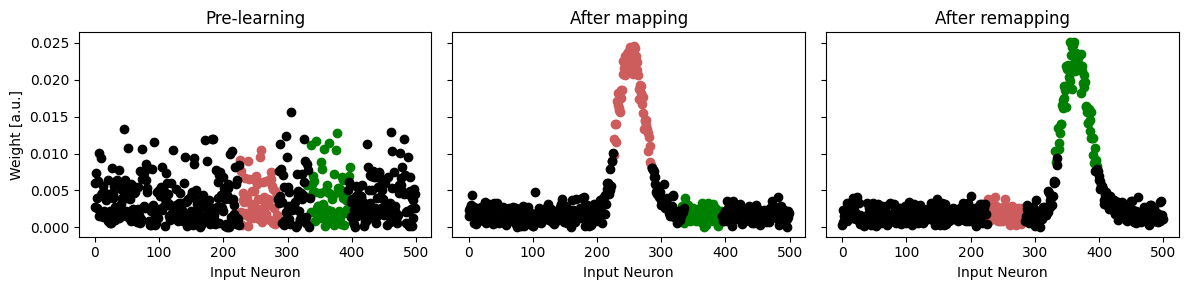

In [249]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3), sharex=True, sharey=True)

x_1 = [i for i in id_cod_1]
x_2 = [i for i in id_cod_2]
x_remain =  [i for i in range(500) if (i not in id_cod_1) and (i not in id_cod_2)]


for i in range(3):

    ax[i].scatter(x_1, traces[i]['w_prox'][sorting[1][loc_id]][x_1], c='indianred')
    ax[i].scatter(x_2, traces[i]['w_prox'][sorting[1][loc_id]][x_2], c='green')
    ax[i].scatter(x_remain, traces[i]['w_prox'][sorting[1][loc_id]][x_remain], c='k')
    ax[i].set_xlabel('Input Neuron')

ax[0].set_ylabel('Weight [a.u.]')

ax[0].set_title('Pre-learning')
ax[1].set_title('After mapping')
ax[2].set_title('After remapping')
plt.tight_layout()
plt.savefig('weights.png')